Imports

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams
from scipy.optimize import curve_fit

Data loading and conversion

In [2]:
# Data loading
df = pd.read_csv('Similar_compounds_JC1_for_plotting.csv')

# Select data
df = df[~df['Condition'].str.contains('GC')]

# Split the 'Treatment' column into 'Compound' and 'Concentration'
df[['Compound', 'Concentration']] = df['Condition'].str.split('_', expand=True)

# Convert 'Concentration' to float
df['Concentration'] = df['Concentration'].astype(float)

df


,Unnamed: 0,Condition,Values,Compound,Concentration
33,48,TRPL_0,1.009458,TRPL,0.0
34,49,TRPL_0,0.959689,TRPL,0.0
35,50,TRPL_0,0.713451,TRPL,0.0
36,51,TRPL_0,0.689514,TRPL,0.0
37,52,TRPL_0,0.863941,TRPL,0.0
...,...,...,...,...,...
277,511,EN300_0.5,0.968155,EN300,0.5
278,512,EN300_0.5,0.838503,EN300,0.5
279,513,EN300_0.5,0.766860,EN300,0.5
280,514,EN300_0.5,0.730074,EN300,0.5


Plotting    

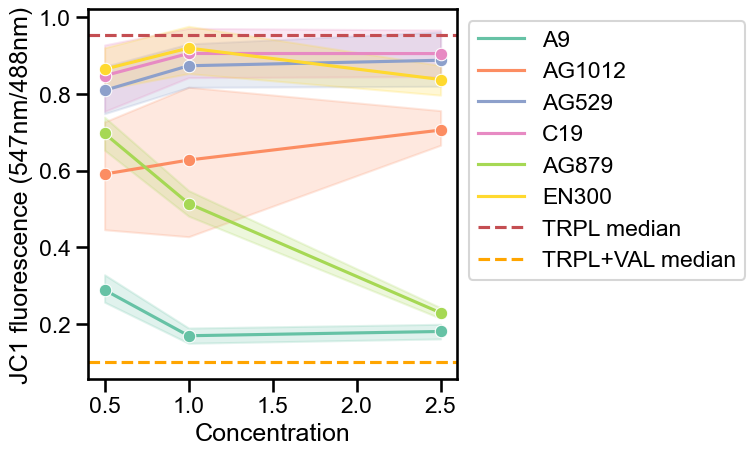

In [6]:
# Set the seaborn style to "talk" and font to "Arial"
sns.set_context("talk")
rcParams['font.family'] = 'Arial'

# Create a list of compounds to exclude from the plot
exclude_compounds = ['TRPL', 'TRPL+VAL']

# Create a new DataFrame excluding the specified compounds
plot_df = df[~df['Compound'].isin(exclude_compounds)]

# Create a line plot with the filtered DataFrame
ax = sns.lineplot(data=plot_df, x='Concentration', y='Values', hue='Compound', style='Compound', marker='o', dashes=False, palette="Set2")

# Define colors for the dashed lines
colors = ['#C44E52', 'orange']

# Calculate the median values of the excluded compounds and add them as dashed lines
for i, compound in enumerate(exclude_compounds):
    median_value = df[df['Compound'] == compound]['Values'].median()
    plt.axhline(y=median_value, linestyle='--', color=colors[i], label=f'{compound} median')

# Set plot title and labels
plt.xlabel('Concentration')
plt.ylabel('JC1 fluorescence (547nm/488nm)')

# Move the legend
ax.legend(loc="upper left", bbox_to_anchor=(1, 1))

# Axis scale
ax.set_box_aspect(1)

# Save the plot
plt.savefig('JC1_similar_compounds' + '.pdf', bbox_inches='tight')
plt.show()
